# Data Challenge5

## Yanruyu Zhu (yaz4004)
### Github Repo:  https://github.com/ZhuYRY/5018_DataScience.git

For this assignment we will be using publicly avaliable data from AirBnB to make 5 original paper quality figures with captions using python! We will focus on the packages numpy, matplotlib, seaborn, and pandas. We will access the AirBnB data at http://insideairbnb.com/get-the-data.html. You can pick any city of your choosing for this analysis --- please only pick one city.

A few requirements for the figures:

Use at least five distinct plot types (i.e. histogram, scatterplot, barplot, stacked barplot, ...)
At least two figures should use a change of color from the default matplotlib or seaborn colors
At least one figure should use 'pd.merge' to join two of the dataframes together
All plots should have a title, axis labels, and legend titles
Variable names are not acceptable for axis labels and legend labels
Figure captions should be three to five sentences and describe the figure and trends in the data.
You will submit this assignment as an html file on Canvas. The code from your assignment should be visible in the html that you submit. Submit your .ipynb file to a GitHub repository and include a link to the repository at the top of the html that you submit on Canvas. Make the repository private and invite the instructor and both of the TAs to your repository.

The rubric for grading is shown below. The assignment is worth 100 pts.

Code Style (10 pts) Is code organized well and commented?

Submission (10 pts) Was the data challenge submitted as an html document on Canvas? Did the html document contain code and written explanations of results? Does the html document look aesthetically pleasing? Did the homework contain a link for a GitHub repository? Did the repository contain the code for the assignment?

Overall Instructions (10 pts) Were the above overall requirements satisfied for the plots (five types of plots, using a merge etc.)?

Figure (10 pts each = 50 pts total) Does each figure tell a compelling and understandable story from the data? Does each figure have a title? Were variable names not used for axis and legend?

Captions (4 pts each = 20 pts total) Quality of figure captions. Are the captions well written? Do they describe the plot and some of the trend in the data?

In [50]:
## load in the required packages 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb
from collections import Counter
from datetime import datetime
import matplotlib.dates as mdates


## Data exploration

In [16]:
listings = pd.read_csv('listings.csv')
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.05,1,321
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,365
2,4886,Country-Style Studio Hip Area FREE CRUISE & WIFI,6792,Ryan Of Cobblestone,NaN,Popincourt,48.86528,2.37115,Entire home/apt,89,3,25,2019-05-06,0.18,11,0
3,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,103,4,23,2020-09-07,0.21,11,72
4,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,48,1,225,2020-08-08,1.64,1,76


In [19]:
reviews = pd.read_csv('reviews.csv')
reviews.head(5)

,listing_id,date
0,2577,2019-01-02
1,3109,2016-12-27
2,3109,2016-12-28
3,3109,2017-10-28
4,3109,2017-11-03


## 1. Scatterplot

Text(0.5, 1.0, 'Scatter plot of Price and number of reviews of Airbnb in Paris')

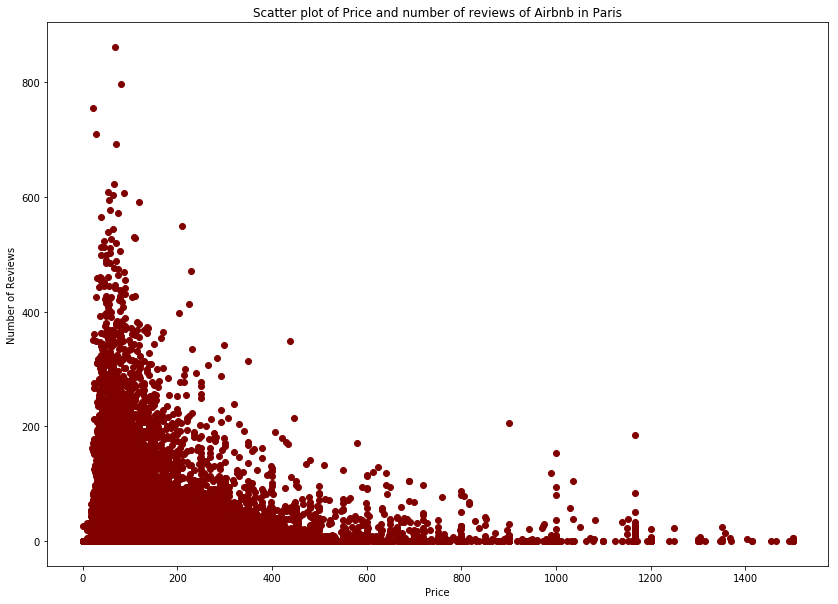

In [70]:
# initialize the plot and set the size
plt.figure(figsize=[14,10])
# Plot the scatter plot of price vs number of reviews, with price larger than 1500 removed as outlier 
hist = plt.scatter(listings[listings['price']<=1500]['price'],listings[listings['price']<=1500]['number_of_reviews'], color = "maroon")
# Add x label
plt.xlabel('Price ($)')
# Add y label
plt.ylabel('Number of Reviews')
# Add title
plt.title('Scatter plot of Price and number of reviews of Airbnb in Paris')

## Caption:
### Each point in the scatterplot shows a listed house with its price and the number of reviews. The number of reviews can range up to more than 800, and we choose to present the price from 0 to 1500, since listings with price higher than 1500 are very rare and are exlcuded as outliers. In general, it is obvious that listings with higher price have lower number of reviews. Most of the listings are around $100 per night. Listings with price from 50 to 150 have the most reviews.

## 2. Barplot

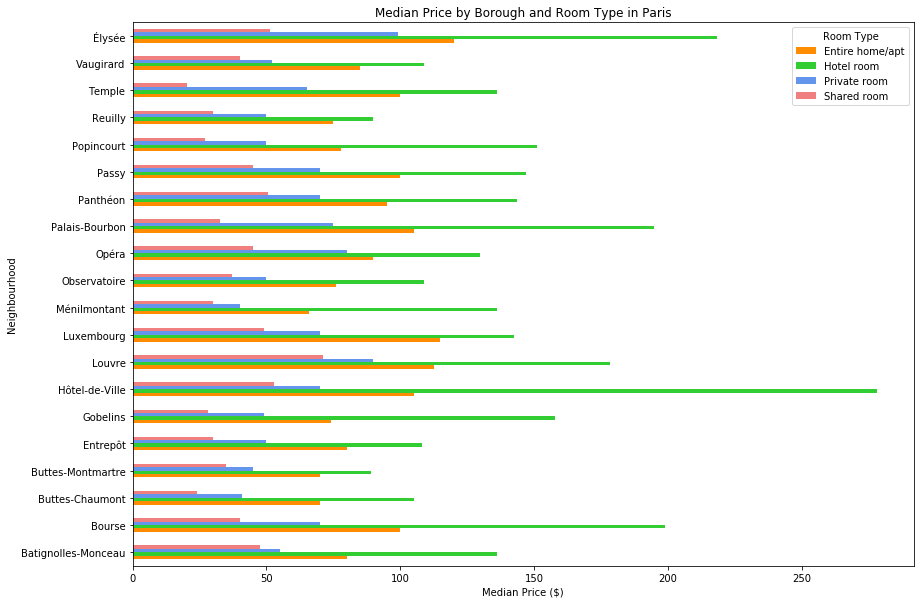

In [48]:
# horizontal bar plot of the median price by borough and room type 
color = ["darkorange","limegreen","cornflowerblue","lightcoral"]
listings.groupby(['neighbourhood','room_type'])['price'].median().unstack().plot.barh(figsize=[14,10],color=color)
# change x label 
plt.xlabel('Median Price ($)')
# change y label
plt.ylabel('Borough')  
# add title
plt.title('Median Price by Borough and Room Type in Paris') 
# change title of legend 
plt.legend(title = 'Room Type')

## Caption:
### The barplot shows the median price for one night of different types of AirBnB listings by Paris borough. Apparently, for all boroughs, hotel room has the highest median price, entire home/apt the second, private room the third, and shared room the least. While the other room types do not have really different median price in each borough, the hotel room in Hotel-de-ville has the highest median price.

## 3. Pie plot

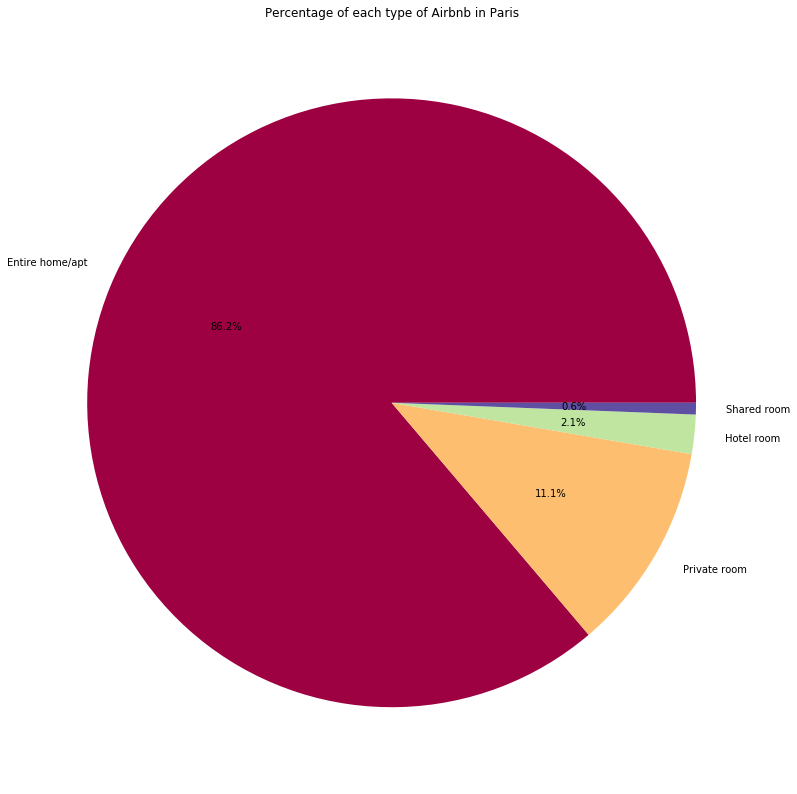

In [108]:
# Process the data first 
# Get the count for each type in the listing
type_num = Counter(listings['room_type'])
# Get the two lists required for the pie chart plotting
name = []
value = []
for types in type_num.keys() :
    name.append(types) 
    value.append(type_num.get(types))
value /= np.sum(value)*0.01
# Plot the pie chart
plt.figure(1, figsize=(14,14))
# Set the color desired
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
# plot the pie chart
plt.pie(value, labels=name, autopct='%1.1f%%', colors=colors)
# Set the title
plt.title("Percentage of each type of Airbnb listings in Paris")
plt.show()

## Caption:
### The pie plot shows the proportion of the number of listings for each room type. Entire house/apt takes up to 86.2% of all the listings and becomes the largest part of the AirBnb listings in Paris. Private room takes 11.1%, Hotel room takes 2.1%, and Shared room takes the least part which is 0.6%. Apparently hosts in Paris tend to rent out their entire house/apt, and only very few hotel brands put their hotels on Airbnb. 

## 4. Histogram

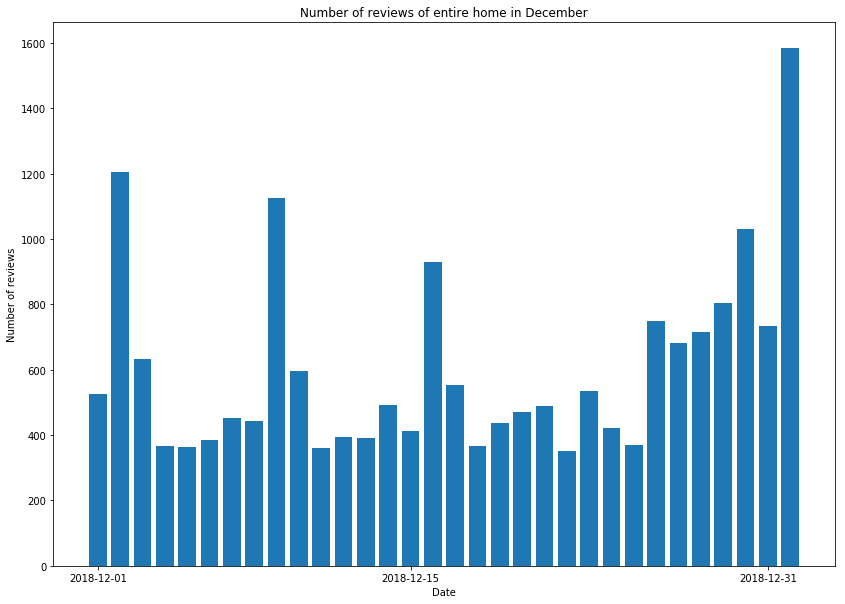

In [52]:
# Processing the data
merge_data = pd.merge(reviews, listings, how = "outer", left_on = "listing_id", right_on = "id")
# filter date to get the range we need
start_date = "2018-12-01"
end_date = "2019-01-01"
after_start_date = merge_data["date"] >= start_date
before_end_date = merge_data["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = merge_data.loc[between_two_dates]
entire = filtered_dates[filtered_dates['room_type'] == 'Entire home/apt']
data = Counter(entire['date'])
x = list(data.keys())
x.sort(key = lambda date: datetime.strptime(date, '%Y-%m-%d'))
y = []
# get the corresponding value
for date in x:
    y.append(data.get(date))

fig, ax = plt.subplots(figsize=(14, 10))
plt.bar(x,y)
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.title('Number of reviews of entire home/apt in December 2018')
ax.set_xticks(['2018-12-01','2018-12-15','2018-12-31'])    
plt.show()

## Caption
### The histogram shows the number of reviews of entire home/apt in December, 2018. December is a peak month for Paris, so the number of reviews are pretty high in this month. The peak (800 to 1200) at the first 3 weeks appear roughly every 7 days, while the number of reviews on weekdays is around 400. The number of reviews increase when Christmas and New Year's Day are coming, because people are visiting Paris for vacation. 

## 5. Boxplot

Text(0, 0.5, 'log value of number of reviews')

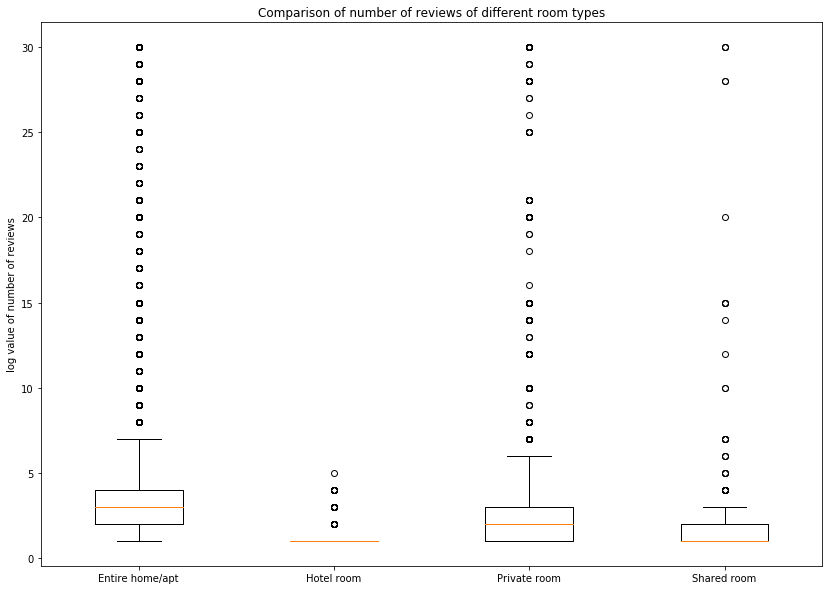

In [49]:
#listings = pd.read_csv('listings.csv')
listings = listings[listings['minimum_nights']<=30]
type_re = listings.loc[:,['room_type','minimum_nights']]
type_re_group = type_re.groupby('room_type').aggregate(lambda x: tuple(x))
fig,axe = plt.subplots(figsize=[14,10])
#listings[listings['price']<=1500]['price']
plt.boxplot([type_re_group['minimum_nights'][0],type_re_group['minimum_nights'][1],type_re_group['minimum_nights'][2],type_re_group['minimum_nights'][3]])
#plt.boxplot([np.log(type_re_group['number_of_reviews'][0]),np.log(type_re_group['number_of_reviews'][1]),np.log(type_re_group['number_of_reviews'][2]),np.log(type_re_group['number_of_reviews'][3])])
plt.title("Comparison of number of reviews of different room types")
axe.set_xticklabels(['Entire home/apt','Hotel room','Private room','Shared room'])
plt.ylabel("log value of number of reviews")

## Caption:
### In fact the minimum nights for each type of listings can range up to 1000 days, but we only select listings with minimum nights smaller than or equal to 30 days (1 month). I would here assume those with minimum nights larger than 30 days are only for long-term renting or the hosts currently do not want to rent the house. The boxplots show the minimum nights for each type of listings. Hotel room has the lowest median as 1 day, with the highest only 5 days, which is normal for a hotel. Private room and shared room have slightly higher median, and the middle 50% of minimum nights for Entire home/apt is the highest. For Entire home/apt, private room, and shared room, they all have many listings with higher minimum nights, while shared room has relativly less listings with high minimum nights.